In [1]:
import fiona
import geopandas as gpd
c = fiona.open('../data/external/202111/tbl_big_ntee_insect_point.shp', encoding='utf-8')
link_gdf = gpd.GeoDataFrame.from_features(c, crs=c.crs).to_crs('epsg:4326')
link_gdf = link_gdf.iloc[link_gdf['EXAMIN_BEG'].dropna().index]

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [2]:
link_gdf.head()

,geometry,SPCE_ID,EXAMIN_REA,SPCS_LCNM,SPCS_SCNCE,EXAMIN_YEA,EXAMIN_BEG,EXAMIN_END
0,POINT (128.29593 35.52562),005000000001325047,곤충,창나방,Striglina cancellata,2014,2014-06-01,2014-06-01
1,POINT (126.38489 36.43714),005000000001325305,곤충,노랑무늬의병벌레,Malachius (Malachius) prolongatus,2014,2014-07-15,2014-07-15
2,POINT (126.38498 36.43756),005000000001325387,곤충,구리꼬마꽃벌,Seladonia (Seladonia) aeraria,2014,2014-06-10,2014-06-10
3,POINT (126.34697 36.44349),005000000001325443,곤충,알락수염노린재,Dolycoris baccarum (Linnaeus),2014,2014-06-11,2014-06-11
4,POINT (126.34697 36.44349),005000000001325449,곤충,섬서구메뚜기,Atractomorpha lata,2014,2014-06-11,2014-06-11


In [3]:
# 달 별로 계절 구하기(12,1,2 : 겨울, 3,4,5 : 봄, 6,7,8 : 여름, 9,10,11 : 가을)

link_gdf['season'] = link_gdf['EXAMIN_BEG'].apply(lambda x : 1 if int(x.split('-')[1]) in [12,1,2] else(2 if int(x.split('-')[1]) in [3,4,5] else(3 if int(x.split('-')[1]) in [6,7,8] else 4)))

In [4]:
# 위도 경도 나눠주기

link_gdf['geometry'] = link_gdf['geometry'].apply(lambda x : str(x).split('(')[1].split(')')[0].split(' '))
link_gdf['geometry'] = link_gdf.apply(lambda x : [float(i) for i in x['geometry']] ,axis=1)

link_gdf['long'] = link_gdf.apply(lambda x : x['geometry'][0],axis=1)
link_gdf['lat'] = link_gdf.apply(lambda x : x['geometry'][1],axis=1)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/geopandas/geodataframe.py:1442: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [5]:
# 데이터가 적은 겨울 계절 삭제
# 데이터가 적은 2015년도 데이터 삭제
# 국명미정 데이터 삭제

link_gdf = link_gdf[link_gdf['season']!=1]
link_gdf = link_gdf[link_gdf['EXAMIN_YEA']!='2015']
link_gdf[link_gdf['SPCS_LCNM']!='(국명미정)']

,geometry,SPCE_ID,EXAMIN_REA,SPCS_LCNM,SPCS_SCNCE,EXAMIN_YEA,EXAMIN_BEG,EXAMIN_END,season,long,lat
0,"[128.29592899990482, 35.52562000108498]",005000000001325047,곤충,창나방,Striglina cancellata,2014,2014-06-01,2014-06-01,3,128.295929,35.525620
1,"[126.38488899992919, 36.43713900059042]",005000000001325305,곤충,노랑무늬의병벌레,Malachius (Malachius) prolongatus,2014,2014-07-15,2014-07-15,3,126.384889,36.437139
2,"[126.38497500037154, 36.43756100093283]",005000000001325387,곤충,구리꼬마꽃벌,Seladonia (Seladonia) aeraria,2014,2014-06-10,2014-06-10,3,126.384975,36.437561
3,"[126.34696700027263, 36.44349400077947]",005000000001325443,곤충,알락수염노린재,Dolycoris baccarum (Linnaeus),2014,2014-06-11,2014-06-11,3,126.346967,36.443494
4,"[126.34696700027263, 36.44349400077947]",005000000001325449,곤충,섬서구메뚜기,Atractomorpha lata,2014,2014-06-11,2014-06-11,3,126.346967,36.443494
...,...,...,...,...,...,...,...,...,...,...,...
206646,"[126.91397499975872, 34.851200000652064]",005000000001324116,곤충,붉은등은무늬밤나방,Erythroplusia pyropia,2017,2017-07-04,2017-07-04,3,126.913975,34.851200
206647,"[126.91397499975872, 34.851200000652064]",005000000001324160,곤충,황줄점갈고리나방,Nordstromia japonica,2017,2017-07-04,2017-07-04,3,126.913975,34.851200
206648,"[126.91397499975872, 34.851200000652064]",005000000001324231,곤충,밑노랑재주나방,Notodonta dembowskii,2017,2017-09-27,2017-09-27,4,126.913975,34.851200
206649,"[126.82123299954733, 34.84825300132888]",005000000001324287,곤충,곧은줄재주나방,Peridea gigantea,2017,2017-06-26,2017-06-26,3,126.821233,34.848253


In [6]:
# 모든 년도, 계절에 존재하는 곤충들만 필터링

ls = []


for i in link_gdf.groupby(['EXAMIN_YEA','season'])['SPCS_LCNM'].unique():
    if len(ls)==0:
        ls.extend(list(i))
    else:
        ls = list(set(ls) & set(i))

link_gdf = link_gdf[link_gdf['SPCS_LCNM'].isin(ls)]

In [7]:
#년도, 시즌 그룹화 후 같은 종의 위도 경도 평균화 작업

temp_df = link_gdf.groupby(['EXAMIN_YEA','season','SPCS_LCNM'])['lat','long'].mean()
temp_df = temp_df.reset_index()
temp_df.head()

/tmp/ipykernel_2509272/2890515307.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp_df = link_gdf.groupby(['EXAMIN_YEA','season','SPCS_LCNM'])['lat','long'].mean()


,EXAMIN_YEA,season,SPCS_LCNM,lat,long
0,2014,2,Vespa crabro,36.646911,126.977366
1,2014,2,Vespa simillima,37.215951,126.997014
2,2014,2,가슴골좁쌀바구미,37.146408,127.020509
3,2014,2,가시노린재,36.927793,127.716652
4,2014,2,가시점둥글노린재,36.576912,127.702745


In [8]:
# 필터링 되고 살아남은 종 저장
spcs_ls = temp_df['SPCS_LCNM'].unique()

In [9]:
len(spcs_ls)

309

In [10]:
# 종별로 위도 경도 묶어주기
save_lat = []
save_long = []

for j in range(309):
    lat = []
    long = []
    cnt=0
    for i in range(12):
        lat.append(temp_df.iloc[cnt+j]['lat'])
        long.append(temp_df.iloc[cnt+j]['long'])
        cnt+=309
    save_lat.append(lat)
    save_long.append(long)

save_lat.extend(save_long)

In [11]:
# 위도 경도 한줄로 묶기

lat_long_ls = []

for i,j in zip(save_lat[:309],save_lat[309:]):
    i.extend(j)
    lat_long_ls.append(i)

In [12]:
import pandas as pd

km_df = pd.DataFrame(lat_long_ls)
km_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,36.646911,36.524126,37.267621,36.243144,35.948844,36.012189,36.259360,35.526920,35.912912,35.920444,...,126.657362,127.481823,128.059853,127.937223,127.059199,127.334236,127.495015,127.902536,127.841637,127.717773
1,37.215951,36.717058,36.763692,36.462716,36.264559,36.897186,37.306944,36.385491,36.015872,36.112683,...,126.820173,127.164761,127.876737,127.996522,127.615556,127.430159,127.830429,128.313325,127.890427,127.845275
2,37.146408,36.612861,36.714556,36.813230,36.844637,36.605899,35.525966,36.172618,36.303923,35.794447,...,126.274056,127.929247,128.336318,128.389604,127.893031,127.482165,127.833017,127.200176,128.663461,127.426678
3,36.927793,36.740125,36.872641,36.138404,36.403556,36.380038,36.131589,35.385191,35.216634,36.630186,...,126.884714,127.962109,127.857109,127.851595,127.133228,127.257665,127.442402,128.002409,127.950823,127.854923
4,36.576912,36.613936,35.497589,36.221561,36.059494,36.018734,35.436663,35.667097,35.117747,36.504580,...,127.857425,127.896199,127.835560,127.682144,127.605076,127.237122,127.407766,128.085387,127.887255,127.720864


In [13]:
# 위도 경도 분리해서 위도 경도와의 차이를 계산하는 구간.

temp_diff_ls = []

for i in range(km_df.shape[0]):
    t = 0
    temp_ls = []
    for ind, j in enumerate(km_df.iloc[i]):
        if t==0 or ind==12:
            t = j
        else:
            temp_ls.append(t-j)
            t=j
    temp_diff_ls.append(temp_ls)

In [14]:
# 구한 위도 경도로 dataframe 구성해주기

km_df_diff = pd.DataFrame(temp_diff_ls)
km_df_diff.index = spcs_ls
km_df_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Vespa crabro,0.122785,-0.743495,1.024477,0.294300,-0.063345,-0.247172,0.732440,-0.385992,-0.007532,-0.191940,...,0.852159,-0.824460,-0.578030,0.122630,0.878024,-0.275037,-0.160779,-0.407521,0.060899,0.123864
Vespa simillima,0.498893,-0.046633,0.300976,0.198156,-0.632627,-0.409758,0.921453,0.369620,-0.096811,-0.229970,...,0.408432,-0.344588,-0.711976,-0.119785,0.380966,0.185397,-0.400270,-0.482896,0.422898,0.045151
가슴골좁쌀바구미,0.533547,-0.101695,-0.098674,-0.031407,0.238738,1.079933,-0.646652,-0.131305,0.509476,-1.058606,...,1.481241,-1.655191,-0.407071,-0.053286,0.496573,0.410866,-0.350852,0.632841,-1.463285,1.236783
가시노린재,0.187668,-0.132516,0.734237,-0.265152,0.023518,0.248449,0.746399,0.168557,-1.413553,0.313274,...,1.346192,-1.077395,0.105000,0.005514,0.718367,-0.124437,-0.184736,-0.560007,0.051585,0.095900
가시점둥글노린재,-0.037024,1.116347,-0.723972,0.162067,0.040760,0.582070,-0.230434,0.549350,-1.386833,0.335282,...,0.478310,-0.038774,0.060638,0.153416,0.077068,0.367954,-0.170644,-0.677621,0.198132,0.166390


In [15]:
# 기후변화 지표종인 나비만 추출

s_ind = ['거꾸로여덟팔나비'
,'긴꼬리제비나비'
,'남방노랑나비'
,'남방부전나비'
,'네발나비'
,'노랑나비'
,'대만흰나비'
,'먹부전나비'
,'물결나비'
,'배추흰나비'
,'별박이세줄나비'
,'부전나비'
,'부처나비'
,'뿔나비'
,'사향제비나비'
,'산제비나비'
,'산호랑나비'
,'암먹부전나비'
,'애기세줄나비'
,'애물결나비'
,'왕자팔랑나비'
,'작은멋쟁이나비'
,'작은주홍부전나비'
,'제비나비'
,'제이줄나비'
,'청띠신선나비'
,'큰멋쟁이나비'
,'큰줄흰나비'
,'푸른부전나비'
,'호랑나비']

In [16]:
# 나비와 나비를 뺀 나머지 데이터와의 분리 작업.

not_s_ls = km_df_diff.index.to_list()

for i in s_ind:
    not_s_ls.remove(i)

s_df = km_df_diff.loc[s_ind]
not_s_df = km_df_diff.loc[not_s_ls]

In [17]:
# 나비에 대한 특징 학습 후, 나비와 같은 특징을 가지는 곤충 종 선정 

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM

scaler = MinMaxScaler()
s_data_scale = scaler.fit_transform(s_df)
not_s_data_scale = scaler.transform(not_s_df)

model = OneClassSVM(gamma='auto').fit(s_data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
not_s_df['class'] = model.predict(not_s_data_scale)

class_1_list = not_s_df[not_s_df['class']==1].index.to_list()
class_m_1_list= not_s_df[not_s_df['class']==-1].index.to_list()

link_gdf=link_gdf.reset_index(drop=True)

In [18]:
not_s_df['class'].value_counts()

-1    238
 1     41
Name: class, dtype: int64

In [19]:
from haversine import haversine
import matplotlib.pyplot as plt
import numpy as np

# 나비와 같은 특징을 가지는 곤충들의 개별 위도 경도 차이 추출
cnt=0
total_save = []
for i in class_1_list:

    temp_lat_long = []
    save = []

    for j in ['2014','2016','2017','2018']:
        for k in [2,3,4]:
            t = temp_df[temp_df['EXAMIN_YEA']==j]
            t = (t[t['season']==k])
            temp_ls = t[t['SPCS_LCNM']==i].iloc[0].to_list()
            temp_ls = [temp_ls[3],temp_ls[4]]
            if len(temp_lat_long)==0:
                temp_lat_long = temp_ls
            else:
                save.append(haversine(temp_lat_long, temp_ls,unit='km'))
                
    total_save.append(save)

In [20]:
from haversine import haversine
import matplotlib.pyplot as plt
import numpy as np

# 나비와 다른 특징을 가지는 곤충들의 개별 위도 경도 차이 추출
cnt=0
total_save2 = []
for i in class_m_1_list:
    
    temp_lat_long = []
    save = []

    for j in ['2014','2016','2017','2018']:
        for k in [2,3,4]:
            t = temp_df[temp_df['EXAMIN_YEA']==j]
            t = (t[t['season']==k])
            temp_ls = t[t['SPCS_LCNM']==i].iloc[0].to_list()
            temp_ls = [temp_ls[3],temp_ls[4]]
            if len(temp_lat_long)==0:
                temp_lat_long = temp_ls
            else:
                save.append(haversine(temp_lat_long, temp_ls,unit='km'))
                
    total_save2.append(save)

In [21]:
for i in class_1_list:
    print(i)

Vespa crabro
가시노린재
갈색날개노린재
검은다리실베짱이
꼬마꽃등에
끝검은말매미충
끝짤룩노랑가지나방
넓은띠담흑수염나방
넓적배허리노린재
노랑띠알락가지나방
노랑테가시잎벌레
다리무늬침노린재
다색띠큰가지나방
더듬이긴노린재
덩굴꽃등에
등검은메뚜기
말매미충
무당벌레
무당알노린재
변색장님노린재
북쪽비단노린재
붉은잡초노린재
빨간긴쐐기노린재
뿔들파리
삿포로잡초노린재
설상무늬장님노린재
수수꽃다리명나방
수중다리꽃등에
썩덩나무노린재
아시아실잠자리
알락수염노린재
알통다리꽃등에
애긴노린재
양봉꿀벌
우리가시허리노린재
좁쌀메뚜기
칠성무당벌레
큰허리노린재
톱다리개미허리노린재
호리꽃등에
황줄점갈고리나방


In [22]:
from haversine import haversine
import matplotlib.pyplot as plt
import numpy as np

# 나비의 개별 위도 경도 차이 추출
cnt=0
total_save3 = []
for i in s_ind:

    temp_lat_long = []
    save = []

    for j in ['2014','2016','2017','2018']:
        for k in [2,3,4]:
            t = temp_df[temp_df['EXAMIN_YEA']==j]
            t = (t[t['season']==k])
            temp_ls = t[t['SPCS_LCNM']==i].iloc[0].to_list()
            temp_ls = [temp_ls[3],temp_ls[4]]
            if len(temp_lat_long)==0:
                temp_lat_long = temp_ls
            else:
                save.append(haversine(temp_lat_long, temp_ls,unit='km'))
                
    total_save3.append(save)

In [23]:
# 나비와 같은 특징 개별 종에 대한 평균
tt1 = [np.mean(i) for i in total_save]

# 나비와 다른 특징 개별 종에 대한 평균
tt2 = [np.mean(i) for i in total_save2]

# 나비 개별 종에 대한 평균
tt3 = [np.mean(i) for i in total_save3]

In [24]:
from scipy.stats import ttest_ind

# 나비와 같은 특징을 가지는 종과, 나비와의 이동 거리에 대한 차이에 대한 통계적 유의성 보기
print(ttest_ind(tt1,tt3))

Ttest_indResult(statistic=1.1776535299017163, pvalue=0.24298075324608712)


In [25]:
# 나비와 다른 특징을 가지는 종과, 나비와의 이동 거리에 대한 차이에 대한 통계적 유의성 보기
print(ttest_ind(tt2,tt3))

Ttest_indResult(statistic=2.9415783399939652, pvalue=0.003553071609040521)


In [26]:
# 나비와 같은 특징을 가지는 종과, 다른 특징을 가지는 종과의 이동 거리에 대한 차이에 대한 통계적 유의성 보기
print(ttest_ind(tt1,tt2))

Ttest_indResult(statistic=-2.1708727947124355, pvalue=0.030790006468999924)


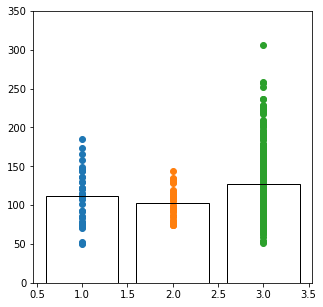

In [29]:
plt.figure(figsize=(5,5))
plt.ylim(0,350)


plt.scatter([1]*len(tt1),tt1)
plt.scatter([2]*len(tt3),tt3)
plt.scatter([3]*len(tt2),tt2)

plt.bar(1,np.mean(tt1),color='None',edgecolor='black')
plt.bar(2,np.mean(tt3),color='None',edgecolor='black')
plt.bar(3,np.mean(tt2),color='None',edgecolor='black')

plt.show()